In [1]:
import pandas as pd
import numpy as np
import math
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
filename = "sap_storing_data_hu_project.csv" 
n = sum(1 for line in open(filename, encoding='utf8'))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df_not_cleaned = pd.read_csv(filename, skiprows=skip)
#verwijder alle kolommen die niet van gebruik zijn:
df = df_not_cleaned.drop(columns=['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt', 'stm_mon_toelichting_trdl', 'stm_oh_pg_mld', 'stm_geo_mld_uit_functiepl', 'stm_scenario_mon', 'stm_status_melding_sap', 'stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 'stm_aanntpl_ddt', 'stm_geo_gst_uit_functiepl', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst', 'stm_progfh_in_ddt', 'stm_progfh_in_invoer_ddt', 'stm_progfh_gw_ddt', 'stm_progfh_gw_lwd_ddt', 'stm_progfh_hz', 'stm_veroorz_groep', 'stm_veroorz_code', 'stm_progfh_gw_duur', 'stm_progfh_gw_lwd_tijd', 'stm_progfh_gw_lwd_datum', 'stm_progfh_gw_datum', 'stm_arbeid', 'stm_functiepl_gst', 'stm_functiepl_mld', 'stm_mon_begintijd', 'stm_mon_begindatum', 'stm_aangelegd_tijd', 'stm_aangelegd_dd', 'stm_dir_betrok_tr', 'stm_evb', 'stm_mon_vhdsincident', 'stm_mon_eind_ddt', 'stm_afspr_aanvangddt', 'stm_effect', 'stm_veroorz_tekst_kort', 'stm_projnr', 'stm_wbi_nummer', 'stm_status_gebr', 'stm_standplaats', 'stm_actie', 'stm_hinderwaarde', 'stm_rec_toegev_ddt', 'stm_afsluit_tijd', 'stm_afsluit_dd', 'stm_afsluit_ddt', 'stm_akkoord_melding_jn', 'stm_fact_jn', 'stm_status_sapnaarmon', 'stm_akkoord_mon_toewijz', 'stm_controle_dd', 'stm_mon_eind_tijd', 'stm_mon_eind_datum', 'stm_reactie_duur', 'stm_afspr_aanvangtijd', 'stm_afspr_aanvangdd', 'stm_historie_toelichting', 'stm_schade_verhaalb_jn', 'stm_x_bron_arch_dt', 'stm_x_bron_bestandsnaam', 'stm_x_bron_publ_dt', 'stm_rapportage_jaar', 'stm_rapportage_maand', 'stm_sorteerveld', 'stm_afspr_func_hersteltijd', 'stm_afspr_func_hersteldd', 'stm_relatiervo', 'stm_relatiervo_volgend', 'stm_relatiervo_vorig', 'stm_schade_statusdatum', 'stm_schade_status_ga', 'stm_schadenr', 'stm_x_start_sessie_dt', 'stm_x_bk', 'stm_x_run_id', 'stm_x_actueel_ind', 'stm_x_vervallen_ind'])
print("Done")

c:\users\game pc\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,11,19,21,25,27,32,36,37,38,39,40,47,48,55,75,78,80,82,83,86,87,99,102,108,109,110,111,113,116,118,119,120,121,122,124) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done


# Data cleaning:


De te bepalen welke variabelen het meest van toepassing zijn om te gebruiken kijken we naar welke
kolommen informatie geven over de tijd van de melding, monteur. Tijd wanneer de melding word opgelost.
Wat voor melding het is en info over de melding/storing, en de locatie. Zo zijn de volgende kolommen
het meest van toepassing:

Over soort melding
- stm_sap_meldtekst (melding omschrijving)
- stm_geo_mld (melding code) - nodig
- stm_oorz_code (oorzaak code) - nodig
- stm_prioriteit (prioriteit)

Over tijd:
- stm_sap_melddatum (datump melding) - nodig
- stm_sap_meldtijd (tijdstip melding) - nodig
- stm_aanngeb_dd (datum aannemer gebeld)
- stm_aanngeb_tijd (tijd aannemer gebeld)
- stm_aanntpl_dd (datum aannemer op plek)
- stm_aanntpl_tijd (tijd aannemer op plek)

- stm_fh_dd (Datum van functie herstel) - nodig
- stm_fh_tijd (Tijdstip van functieherstel) - nodig
- stm_sap_storeinddatum (Datum einde storing) - nodig
- stm_sap_storeindtijd (Tijdstip einde storing) - nodig
- stm_fh_duur (Duur van functiehersteltijd) - nodig

Over equipment:
- stm_equipm_nr_mld (equipment)
- stm_equipm_omschr_mld (equipment omschrijving)

Over locatie
- stm_km_van_mld (locatie van)
- stm_km_tot_mld (locatie tot)
- stm_vl_post (VL post) - nodig
- stm_contractgeb_mld(locatie melding) - nodig
- stm_pplg_van (PPLG van locatie)
- stm_pplg_naar (PPLG tot locatie)
- stm_dstrglp_van (Dienstregelpunt van locatie)
- stm_dstrglp_naar (Dienstregelpunt tot locatie)

Over prognose:
- stm_progfh_in_datum (Datum prognose)
- stm_progfh_in_tijd (Tijdstip FHT prognose)
- stm_progfh_in_invoer_dat (Invoer datum prognose)
- stm_progfh_in_invoer_tijd (Invoer tijdstip FHT prognose)
- stm_progfh_in_duur (Duur FHT)



In [3]:
#deze functie verwijdert alle rijen waar geen value op de gegeven kolommen zitten
def drop_rows_with_null(lst, df):
    dfisnull = df.isnull()[lst]
    matches = dfisnull[(dfisnull).any(axis=1)]
    return df.drop(matches.index)

In [4]:
#Deze functie berkent de uitschiet grenzen
def uitschieters_bereken(kolom):
    q1 = kolom.quantile(0.25)
    q3 = kolom.quantile(0.75)
    iqr = q3 - q1
    maxuitschieter = q3 + (iqr*1.5)
    minuitschieter = q1 - (iqr*1.5)
    return maxuitschieter, minuitschieter

#Deze functie geeft de indexes van uitschieters in een kolom
def return_uitschieters_indexes(kolom):
    maxuitschieter = uitschieters_bereken(kolom)[0]
    minuitschieter = uitschieters_bereken(kolom)[1]
    uitschieters = [kolom[kolom > maxuitschieter].index, kolom[kolom < minuitschieter].index]
    return uitschieters
    
#Deze functie geeft een kolom zonder uitschieters
def return_kolom_zonder_uitschieters(kolom):
    maxuitschieter = uitschieters_bereken(kolom)[0]
    minuitschieter = uitschieters_bereken(kolom)[1]
    kolom = kolom[kolom < maxuitschieter][kolom > minuitschieter]
    return kolom


In [5]:
#Deze functie berkent de extreme uitschiet grenzen
def ex_uitschieters_bereken(kolom):
    q1 = kolom.quantile(0.25)
    q3 = kolom.quantile(0.75)
    iqr = q3 - q1
    maxuitschieter = q3 + (iqr*3)
    minuitschieter = q1 - (iqr*3)
    return maxuitschieter, minuitschieter

#Deze functie geeft de indexes van extreme uitschieters in een kolom
def return_ex_uitschieters_indexes(kolom):
    maxuitschieter = uitschieters_ex_bereken(kolom)[0]
    minuitschieter = uitschieters_ex_bereken(kolom)[1]
    uitschieters = [kolom[kolom > maxuitschieter].index, kolom[kolom < minuitschieter].index]
    return uitschieters
    
#Deze functie geeft een kolom zonder extreme uitschieters
def return_kolom_zonder_ex_uitschieters(kolom):
    maxuitschieter = uitschieters_ex_bereken(kolom)[0]
    minuitschieter = uitschieters_ex_bereken(kolom)[1]
    kolom = kolom[kolom < maxuitschieter][kolom > minuitschieter]
    return kolom



In [6]:
# Verwijder de rijen die geen value bevatten in de benodigde kolommen
df_filtered = drop_rows_with_null(['stm_geo_mld', 'stm_sap_melddatum', 'stm_oorz_code', 'stm_sap_meldtijd',
                          'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd',
                          'stm_fh_duur', 'stm_vl_post', 'stm_contractgeb_mld'], df)
print(len(df))
print(len(df_filtered))
df_filtered

89852
13113


,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_equipm_nr_mld,stm_equipm_soort_mld,...,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
39,406,50053865,286.0,UT,08/02/2006 23:45:00,Logboeknr RBV : 286 Tijd: 2345 VL-Post: ...,Logboeknr RBV : 286 Tijd: 2345 VL-P,102,10654069.0,SYSTBOVENL,...,08/02/2006,23:50:00,5.0,08/02/2006,23:50:00,SMC R'dam heeft geen schakelopdr bij WBI,NaN,NaN,Wd,NaN
74,686,50054308,196.0,EHV,08/03/2006 21:56:00,Logboeknr RBV : 196 Tijd: 2156 VL-Post: ...,Logboeknr RBV : 196 Tijd: 2156 VL-P,49,10145202.0,OVERWEG,...,08/03/2006,22:09:00,13.0,09/03/2006,09:06:00,Geen SMC-melding.,NaN,NaN,Ck,NaN
78,736,50054388,16.0,ASD,13/03/2006 04:50:00,Logboeknr RBV : 16 Tijd: 0450 VL-Post: ...,Na einde werkzaamheden bleef er sectiest,133,10027952.0,DETGRSSSL,...,13/03/2006,07:10:00,140.0,13/03/2006,07:10:00,zie memoveld TMW,NaN,NaN,Hfdm,NaN
79,743,50054401,236.0,GN,15/03/2006 11:30:00,Logboeknr RBV : 236 Tijd: 1130 VL-Post: ...,Logboeknr RBV : 236 Tijd: 1130 VL-P,552,10221792.0,SEIN,...,15/03/2006,11:32:00,2.0,15/03/2006,11:32:00,NaN,NaN,NaN,Gnl,NaN
81,749,50054410,208.0,EHV,14/03/2006 08:20:00,Lpe : Wl-1273A/B RL n.i.c. (eenmalig) tr 923 ...,Lpe : Wl-1273A/B RL n.i.c. (eenmalig) tr,54,10579147.0,WISSEL,...,14/03/2006,08:30:00,10.0,16/03/2006,09:38:00,Geen SMC-melding.Geen onderzoek geweest.,NaN,NaN,LPE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89800,907997,96001282,3082711.0,EHV,16/05/2015 12:56:00,LET OP: MELDING IS DOOR ASSETRAIL AL VOLLEDIG...,LET OP: MELDING IS DOOR ASSETRAIL AL VOL,49,10551783.0,BAANLICHAA,...,16/05/2015,15:10:00,0.0,16/05/2015,15:17:00,Bleek een schaap te zijn. Opgeruimd.,MO,NaN,MMLH,NMH
89801,908013,96001288,3626844.0,GN,24/04/2016 01:06:16,"Lw-Gn : ahob 43.6 gestoord, plus een tobs","Lw-Gn : ahob 43.6 gestoord, plus een tob",2,10210880.0,OVERWEG,...,24/04/2016,02:03:00,112.0,24/04/2016,02:04:00,Muntje op ES las.,FWD,NaN,FWD,DWE
89802,908021,96001289,3626889.0,ZL,24/04/2016 02:41:51,Bl-Asn : ahob 39.6 op de storingsmelder,Bl-Asn : ahob 39.6 op de storingsmelder,12,10211043.0,OVERWEG,...,24/04/2016,03:49:00,9.0,24/04/2016,03:50:00,Gestoord object: OVERWEG 39.6. Gestoord,BL,NaN,BL,ASN
89816,908156,99002906,282595.0,GVC,11/03/2008 17:42:00,ten onrechte bezet spoor in sectie 51AT.opnie...,ten onrechte bezet spoor in sectie 51AT.,560,10028157.0,DETGRSSSL,...,11/03/2008,18:28:00,42.0,11/03/2008,19:10:00,NaN,GVC,NaN,GVC,NaN


In [7]:
#uitgeschreven lijsten zodat ik ze niet steeds hoef over te typen

# melding
df[['stm_sap_meldtekst', 'stm_geo_mld', 'stm_oorz_code', 'stm_prioriteit']]
# tijd
df[['stm_sap_melddatum', 'stm_sap_meldtijd', 'stm_aanngeb_dd', 'stm_aanngeb_tijd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd']]
df[['stm_fh_dd', 'stm_fh_tijd', 'stm_fh_duur', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd']]
# equipment
df[['stm_equipm_omschr_mld', 'stm_equipm_nr_mld']]
# locatie
df[['stm_km_van_mld', 'stm_km_tot_mld', 'stm_vl_post', 'stm_contractgeb_mld', 'stm_pplg_van', 'stm_pplg_naar', 'stm_dstrglp_van', 'stm_dstrglp_naar']]
# prognose
df[['stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_in_duur']]


,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur
0,NaN,00:00:00,NaN,00:00:00,1e+08
1,NaN,00:00:00,NaN,00:00:00,1e+08
2,NaN,00:00:00,NaN,00:00:00,1e+08
3,NaN,00:00:00,NaN,00:00:00,1e+08
4,NaN,00:00:00,NaN,00:00:00,1e+08
...,...,...,...,...,...
89847,NaN,00:00:00,NaN,00:00:00,99999999
89848,13/05/2013,03:30:00,13/05/2013,03:31:05,180
89849,13/05/2013,03:30:00,13/05/2013,03:31:05,180
89850,11/05/2013,11:00:00,11/05/2013,10:16:27,52


# Baseline
Target variabele is 'stm_fh_duur'. Dit is de functie hersteltijd dit houd in dat vanaf de melding tot dat het probleem opgelost is getimed wordt. 

baseline:  

In [141]:
data_fht = df_filtered['stm_fh_duur']

In [142]:
data_fht.mean()

456.58270418668496

In [143]:
data_fht.describe()

count     13113.000000
mean        456.582704
std        2853.005643
min           0.000000
25%          57.000000
50%         100.000000
75%         214.000000
max      171483.000000
Name: stm_fh_duur, dtype: float64

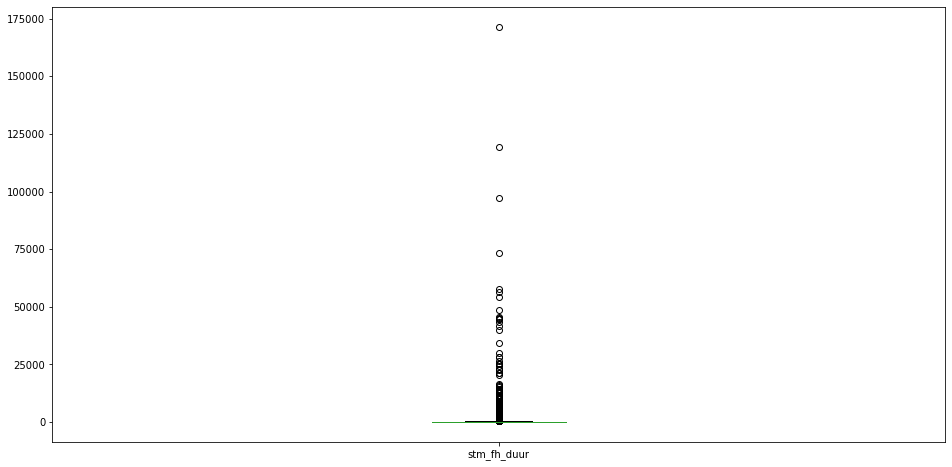

In [144]:
data_fht.plot.box(figsize=(16,8))

In [145]:
len(data_fht[data_fht < data_fht.mean()])

11112

In [146]:
len(data_fht[data_fht < data_fht.mean()])/len(data_fht)*100

84.74033401967513

In [181]:
afstand = ['stm_km_tot_mld']
tijd = ['stm_fh_duur']
X= df[afstand]
y= df[tijd]

In [182]:
# de data splitsen in training en testing data
from sklearn.model_selection import train_test_split
# test_size
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=None) 

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
linear_reg_model = LinearRegression()

In [185]:
linear_reg_model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [186]:
from sklearn.metrics import mean_squared_error

y_pred_test = linear_reg_model.predict(X_test)

error_metric = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
print(error_metric)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.